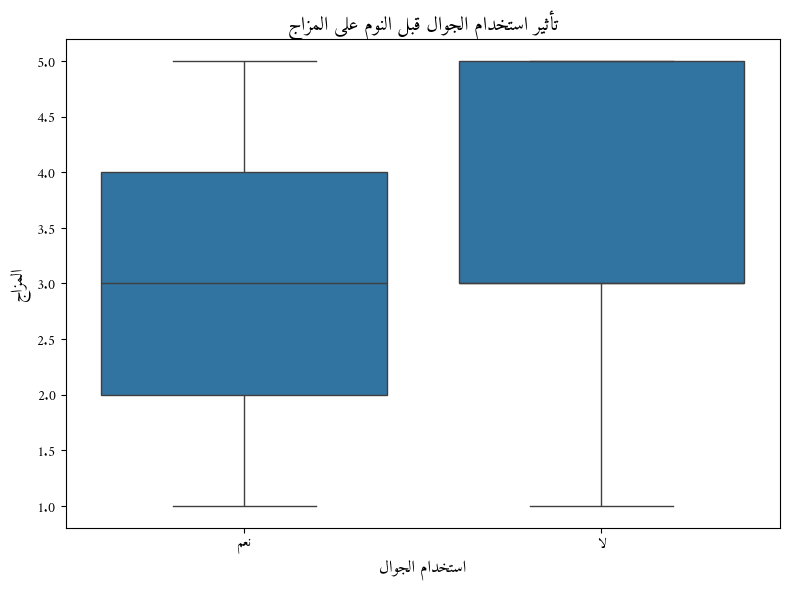

ﺔﻄﻘﻧ 0.41- :ﻢﻫﺮﻴﻏﻭ ﻝﺍﻮﺠﻟﺍ ﻲﻣﺪﺨﺘﺴﻣ ﻦﻴﺑ ﺝﺍﺰﻤﻟﺍ ﻂﺳﻮﺘﻣ ﻕﺮﻓ
p-value): 0.6138) ﺔﻴﻟﺎﻤﺘﺣﻻﺍ ﺔﻤﻴﻗ


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.font_manager as fm
import arabic_reshaper
from bidi.algorithm import get_display

# تحميل الخط
font_path = "C:/Users/gknow/Desktop/sleep_study_project/Amiri-Regular.ttf"
arabic_font = fm.FontProperties(fname=font_path)

# دالة لتنسيق النص العربي
def reshape_arabic(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)

# تحميل البيانات
df = pd.read_csv('C:/Users/gknow/Desktop/sleep_study_project/data/processed/sleep_data_clean.csv', encoding='utf-8-sig')
df.columns = df.columns.str.strip()
df = df.dropna(subset=['مزاج', 'هل تستخدم الجوال قبل النوم؟'])
df['جوال_مصنف'] = df['هل تستخدم الجوال قبل النوم؟'].apply(lambda x: 'لا' if 'لا' in x else 'نعم')

# تحويل النصوص العربية
title = reshape_arabic("تأثير استخدام الجوال قبل النوم على المزاج")
xlabel = reshape_arabic("استخدام الجوال")
ylabel = reshape_arabic("المزاج")
xticks_labels = [reshape_arabic(tick) for tick in df['جوال_مصنف'].unique()]

# الرسم
plt.figure(figsize=(8, 6))
sns.boxplot(x='جوال_مصنف', y='مزاج', data=df)

plt.title(title, fontproperties=arabic_font, fontsize=14)
plt.xlabel(xlabel, fontproperties=arabic_font, fontsize=12)
plt.ylabel(ylabel, fontproperties=arabic_font, fontsize=12)
plt.xticks(ticks=[0, 1], labels=xticks_labels, fontproperties=arabic_font)
plt.yticks(fontproperties=arabic_font)
plt.tight_layout()
plt.show()

# اختبار t
group1 = df[df['جوال_مصنف'] == 'نعم']['مزاج']
group2 = df[df['جوال_مصنف'] == 'لا']['مزاج']
t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)
diff = group1.mean() - group2.mean()

# طباعة النتائج بالعربية
result_text = reshape_arabic(f"فرق متوسط المزاج بين مستخدمي الجوال وغيرهم: {diff:.2f} نقطة")
pval_text = reshape_arabic(f"قيمة الاحتمالية (p-value): {p_val:.4f}")
print(result_text)
print(pval_text)


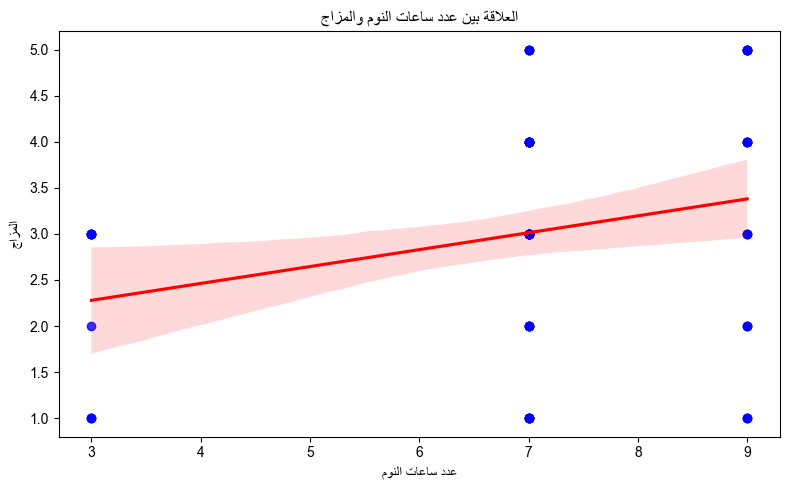

✅ تم حفظ تحليل العلاقة بين النوم والمزاج في ملف output_sleep_mood.txt


In [12]:
from scipy.stats import pearsonr

# إسقاط القيم الفارغة في الأعمدة الرقمية
df_clean = df.dropna(subset=['ساعات_النوم_رقمي', 'مزاج'])

# رسم العلاقة
plt.figure(figsize=(8, 5))
sns.regplot(x='ساعات_النوم_رقمي', y='مزاج', data=df_clean, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title(get_display(arabic_reshaper.reshape("العلاقة بين عدد ساعات النوم والمزاج")))
plt.xlabel(get_display(arabic_reshaper.reshape("عدد ساعات النوم")))
plt.ylabel(get_display(arabic_reshaper.reshape("المزاج")))

plt.tight_layout()
plt.show()

# حساب معامل الارتباط
corr, p_val = pearsonr(df_clean['ساعات_النوم_رقمي'], df_clean['مزاج'])

corr_text = get_display(arabic_reshaper.reshape(f"معامل الارتباط بين عدد ساعات النوم والمزاج: {corr:.2f}"))
pval_text = get_display(arabic_reshaper.reshape(f"قيمة الاحتمالية (p-value): {p_val:.4f}"))

# حفظ النتائج في ملف نصي
with open("C:/Users/gknow/Desktop/sleep_study_project/output_sleep_mood.txt", "w", encoding="utf-8") as f:
    f.write(corr_text + "\n")
    f.write(pval_text + "\n")

print("✅ تم حفظ تحليل العلاقة بين النوم والمزاج في ملف output_sleep_mood.txt")


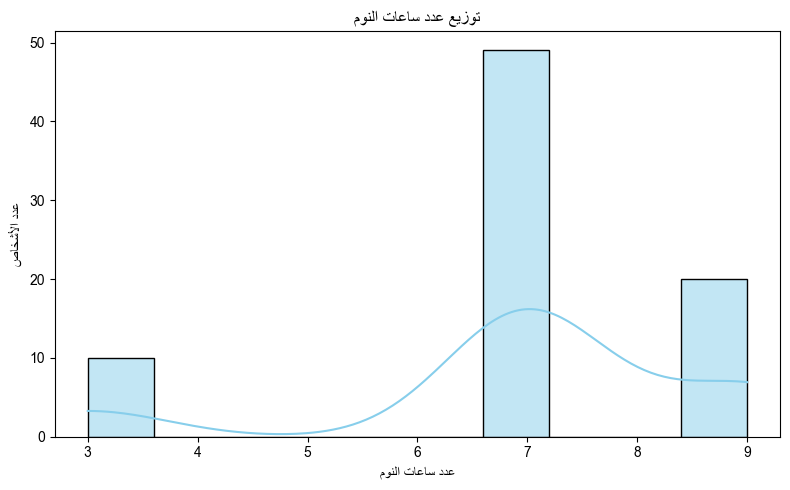

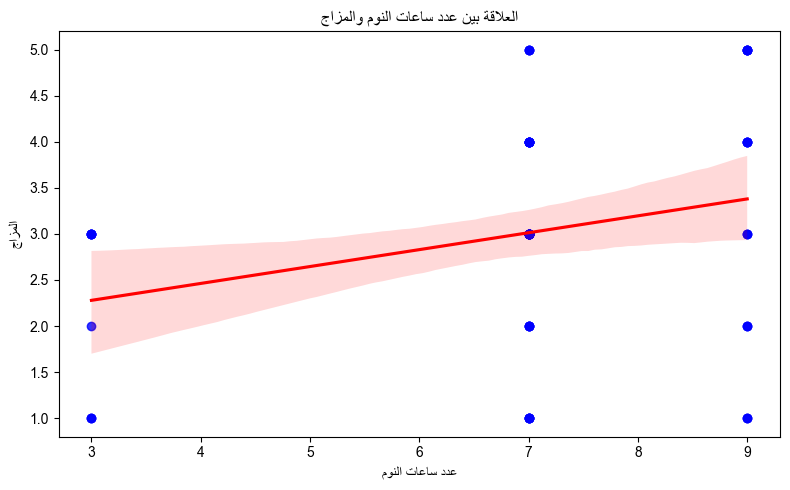

✅ تم حفظ تحليل العلاقة بين النوم والمزاج في ملف output_sleep_mood.txt


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
from scipy.stats import pearsonr

# تحميل البيانات
df = pd.read_csv('C:/Users/gknow/Desktop/sleep_study_project/data/processed/sleep_data_clean.csv', encoding='utf-8-sig')
df.columns = df.columns.str.strip()

# إسقاط القيم الفارغة في العمود الصحيح
df = df.dropna(subset=['ساعات_النوم_رقمي', 'مزاج'])

# رسم توزيع ساعات النوم
plt.figure(figsize=(8, 5))
sns.histplot(df['ساعات_النوم_رقمي'], bins=10, kde=True, color='skyblue')
plt.title(get_display(arabic_reshaper.reshape("توزيع عدد ساعات النوم")))
plt.xlabel(get_display(arabic_reshaper.reshape("عدد ساعات النوم")))
plt.ylabel(get_display(arabic_reshaper.reshape("عدد الأشخاص")))
plt.tight_layout()
plt.show()

# رسم العلاقة بين ساعات النوم والمزاج
plt.figure(figsize=(8, 5))
sns.regplot(x='ساعات_النوم_رقمي', y='مزاج', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title(get_display(arabic_reshaper.reshape("العلاقة بين عدد ساعات النوم والمزاج")))
plt.xlabel(get_display(arabic_reshaper.reshape("عدد ساعات النوم")))
plt.ylabel(get_display(arabic_reshaper.reshape("المزاج")))
plt.tight_layout()
plt.show()

# حساب معامل الارتباط
corr, p_val = pearsonr(df['ساعات_النوم_رقمي'], df['مزاج'])

corr_text = get_display(arabic_reshaper.reshape(f"معامل الارتباط بين عدد ساعات النوم والمزاج: {corr:.2f}"))
pval_text = get_display(arabic_reshaper.reshape(f"قيمة الاحتمالية (p-value): {p_val:.4f}"))

# حفظ النتائج في ملف نصي
with open("C:/Users/gknow/Desktop/sleep_study_project/output_sleep_mood.txt", "w", encoding="utf-8") as f:
    f.write(corr_text + "\n")
    f.write(pval_text + "\n")

print("✅ تم حفظ تحليل العلاقة بين النوم والمزاج في ملف output_sleep_mood.txt")


معامل الارتباط بين العمر وساعات النوم: -0.25
قيمة الاحتمالية p: 0.0251


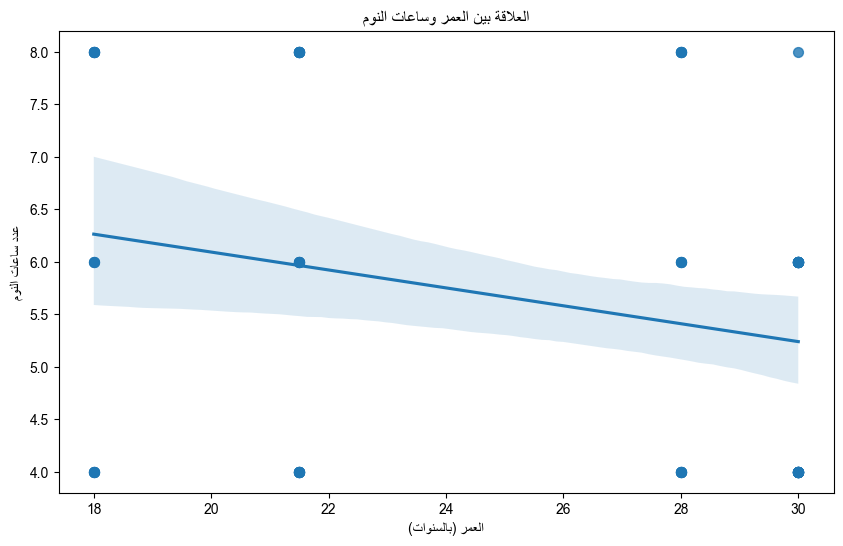

In [21]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from scipy.stats import pearsonr

def range_to_mean(age_str):
    if pd.isna(age_str):
        return None
    age_str = str(age_str).strip()
    if age_str.isdigit():
        return float(age_str)
    numbers = re.findall(r'\d+', age_str)
    if len(numbers) == 2:
        return (float(numbers[0]) + float(numbers[1])) / 2
    elif len(numbers) == 1:
        return float(numbers[0])
    else:
        return None

def extract_hours(text):
    if pd.isna(text):
        return None
    text = str(text)
    match = re.search(r'\d+(\.\d+)?', text)
    if match:
        return float(match.group())
    return None

df = pd.read_csv('C:/Users/gknow/Desktop/sleep_study_project/data/processed/sleep_data_clean.csv', encoding='utf-8-sig')
df.columns = df.columns.str.strip()

df['العمر_الرقمي'] = df['كم عمرك؟'].apply(range_to_mean)
df['ساعات_النوم_رقمي'] = df['ساعات_النوم'].apply(extract_hours)

df_clean = df.dropna(subset=['العمر_الرقمي', 'ساعات_النوم_رقمي'])

# حساب معامل الارتباط
corr, p_val = pearsonr(df_clean['العمر_الرقمي'], df_clean['ساعات_النوم_رقمي'])
print(f"معامل الارتباط بين العمر وساعات النوم: {corr:.2f}")
print(f"قيمة الاحتمالية p: {p_val:.4f}")

# رسم مع خط الميل (regression)
plt.figure(figsize=(10,6))
sns.regplot(x='العمر_الرقمي', y='ساعات_النوم_رقمي', data=df_clean, scatter_kws={'s':50})

plt.title(get_display(arabic_reshaper.reshape("العلاقة بين العمر وساعات النوم")))
plt.xlabel(get_display(arabic_reshaper.reshape("العمر (بالسنوات)")))
plt.ylabel(get_display(arabic_reshaper.reshape("عدد ساعات النوم")))

plt.show()


متوسط مستوى الطاقة مع القيلولة: 2.52
متوسط مستوى الطاقة بدون القيلولة: 2.74
قيمة t: -0.68
قيمة الاحتمالية p: 0.4965


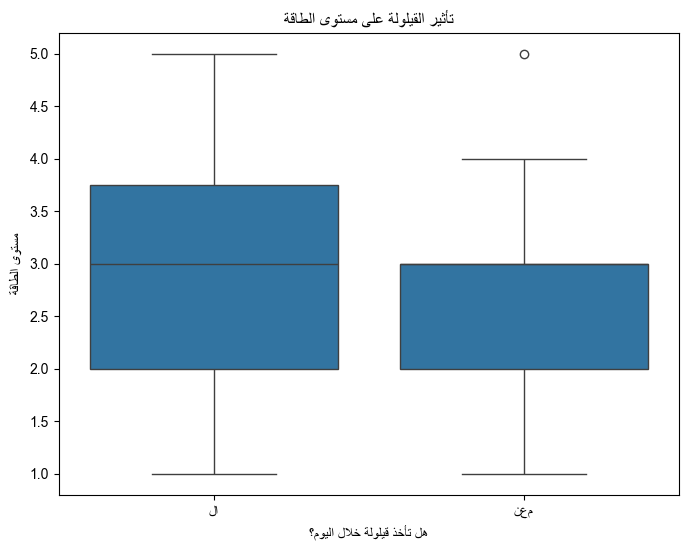

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import arabic_reshaper
from bidi.algorithm import get_display

# تنظيف البيانات من القيم الفارغة في العمودين
df_clean = df.dropna(subset=['هل تأخذ قيلولة خلال اليوم؟', 'طاقة'])

# فصل المجموعات حسب القيلولة
group_nap = df_clean[df_clean['هل تأخذ قيلولة خلال اليوم؟'].str.strip() == 'نعم']['طاقة']
group_no_nap = df_clean[df_clean['هل تأخذ قيلولة خلال اليوم؟'].str.strip() == 'لا']['طاقة']

# حساب المتوسطات
mean_nap = group_nap.mean()
mean_no_nap = group_no_nap.mean()

print(f"متوسط مستوى الطاقة مع القيلولة: {mean_nap:.2f}")
print(f"متوسط مستوى الطاقة بدون القيلولة: {mean_no_nap:.2f}")

# اختبار t لمعرفة الفرق إحصائيًا
t_stat, p_value = ttest_ind(group_nap, group_no_nap, nan_policy='omit')

print(f"قيمة t: {t_stat:.2f}")
print(f"قيمة الاحتمالية p: {p_value:.4f}")

# رسم بياني (boxplot) للمقارنة
plt.figure(figsize=(8,6))
sns.boxplot(x='هل تأخذ قيلولة خلال اليوم؟', y='طاقة', data=df_clean)

plt.title(get_display(arabic_reshaper.reshape("تأثير القيلولة على مستوى الطاقة")))
plt.xlabel(get_display(arabic_reshaper.reshape("هل تأخذ قيلولة خلال اليوم؟")))
plt.ylabel(get_display(arabic_reshaper.reshape("مستوى الطاقة")))

plt.show()


أكثر أسباب قلة النوم شيوعًا:
ضغط نفسي أو قلق: 26 مرة
عادات نوم غير منظمة: 21 مرة
لا أعرف: 21 مرة
إدمان جوال أو شاشة: 8 مرة
الدراسة/العمل: 3 مرة


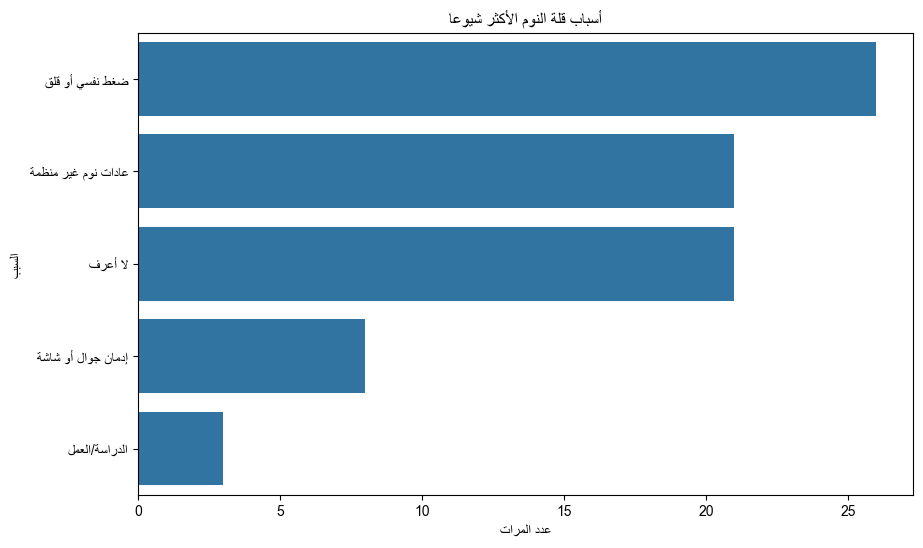

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import arabic_reshaper
from bidi.algorithm import get_display

reasons_series = df['ما سبب قلة نومك (لو كنت تنام أقل من 6 ساعات غالبًا)؟'].dropna().astype(str)

all_reasons = []
for reasons in reasons_series:
    parts = re.split(r'[،,]', reasons)
    parts = [part.strip() for part in parts if part.strip()]
    all_reasons.extend(parts)

counter = Counter(all_reasons)
most_common = counter.most_common(10)

print("أكثر أسباب قلة النوم شيوعًا:")
for reason, count in most_common:
    print(f"{reason}: {count} مرة")

reasons, counts = zip(*most_common)

# ترتيب النصوص العربية لعرض صحيح
reshaped_reasons = [get_display(arabic_reshaper.reshape(reason)) for reason in reasons]

plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=reshaped_reasons)

plt.title(get_display(arabic_reshaper.reshape("أسباب قلة النوم الأكثر شيوعًا")))
plt.xlabel(get_display(arabic_reshaper.reshape("عدد المرات")))
plt.ylabel(get_display(arabic_reshaper.reshape("السبب")))

plt.show()


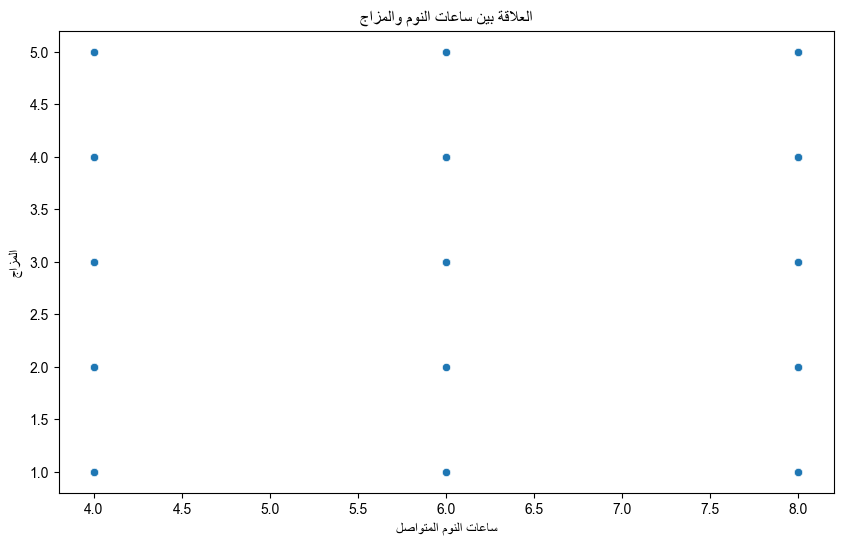

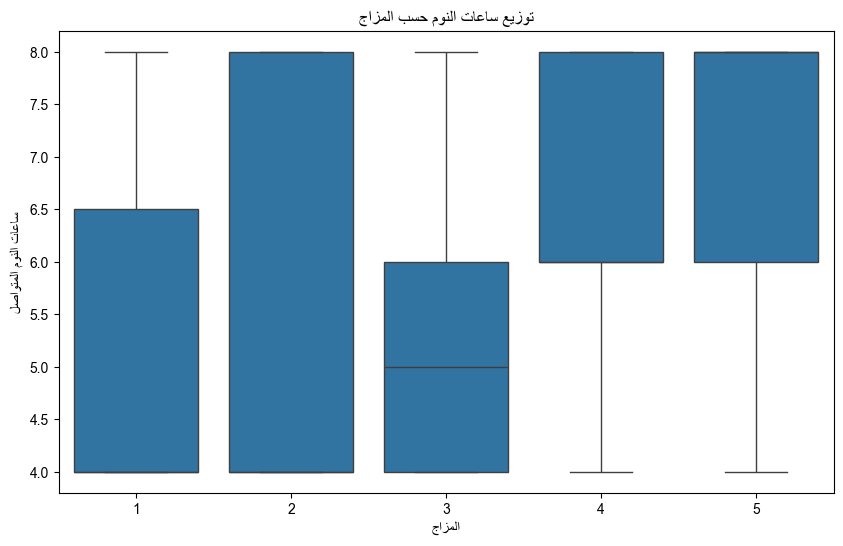

معامل الارتباط بين ساعات النوم والمزاج هو: 0.27


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

# اختر الأعمدة التي نحتاجها فقط (تنظيف البيانات من القيم الناقصة)
df_clean = df[['ساعات_النوم_رقمي', 'مزاج']].dropna()

# لو المزاج نصي، يمكن تحويله إلى ترتيب رقمي (مثلاً):
# مثال افتراضي (غير ملزم، عدل حسب بياناتك):
# مزاج_values = {'سيء': 1, 'متوسط': 2, 'جيد': 3}
# df_clean['مزاج_رقمي'] = df_clean['مزاج'].map(مزاج_values)

# هنا سنفترض أن 'مزاج' رقمي أو يمكن استخدامه مباشرة.

# لرؤية العلاقة: نرسم scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x='ساعات_النوم_رقمي', y='مزاج')

plt.title(get_display(arabic_reshaper.reshape("العلاقة بين ساعات النوم والمزاج")))
plt.xlabel(get_display(arabic_reshaper.reshape("ساعات النوم المتواصل")))
plt.ylabel(get_display(arabic_reshaper.reshape("المزاج")))

plt.show()

# إذا المزاج تصنيفي وليس رقمي، يمكن عمل boxplot لتوضيح التوزيع
# مثال:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean, x='مزاج', y='ساعات_النوم_رقمي')

plt.title(get_display(arabic_reshaper.reshape("توزيع ساعات النوم حسب المزاج")))
plt.xlabel(get_display(arabic_reshaper.reshape("المزاج")))
plt.ylabel(get_display(arabic_reshaper.reshape("ساعات النوم المتواصل")))

plt.show()

# لحساب معامل الارتباط (إذا المزاج رقمي):
if pd.api.types.is_numeric_dtype(df_clean['مزاج']):
    corr = df_clean['ساعات_النوم_رقمي'].corr(df_clean['مزاج'])
    print(f"معامل الارتباط بين ساعات النوم والمزاج هو: {corr:.2f}")
else:
    print("عمود المزاج غير رقمي، لا يمكن حساب معامل الارتباط مباشرة.")


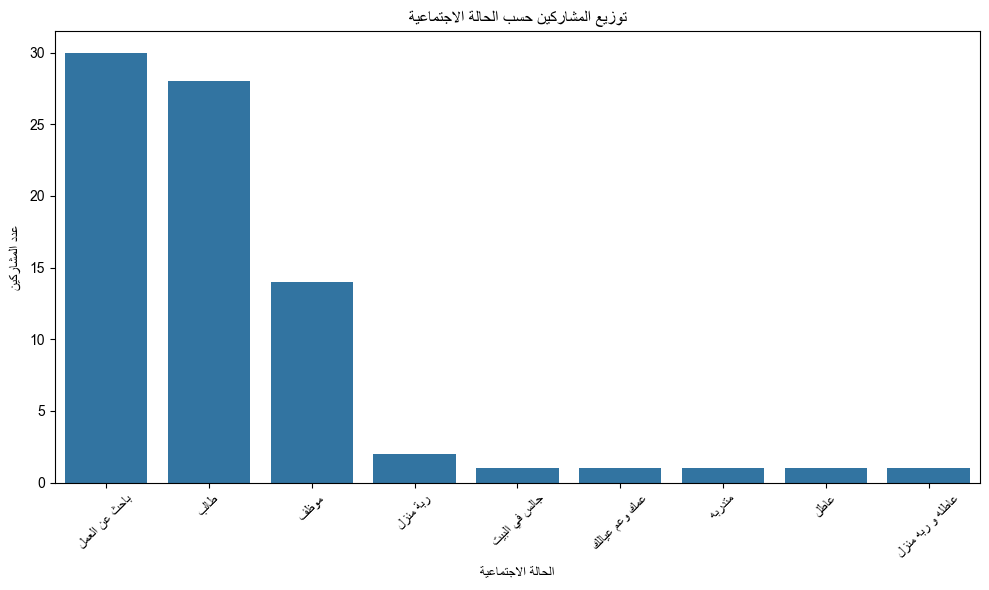

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

# ناخذ العمود ونحسب التكرارات
counts = df['الحالة الحالية'].value_counts()

# ترتيب النصوص العربية للعرض الصحيح
labels = [get_display(arabic_reshaper.reshape(str(label))) for label in counts.index]

plt.figure(figsize=(10,6))
sns.barplot(x=labels, y=counts.values)

plt.title(get_display(arabic_reshaper.reshape("توزيع المشاركين حسب الحالة الاجتماعية")))
plt.xlabel(get_display(arabic_reshaper.reshape("الحالة الاجتماعية")))
plt.ylabel(get_display(arabic_reshaper.reshape("عدد المشاركين")))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
grouped = df.groupby('ساعات_النوم_رقمي')['تسويف_رقمي'].agg(['mean', 'std', 'count']).reset_index()
print(grouped)


   ساعات_النوم_رقمي      mean       std  count
0               4.0  0.779412  0.306277     34
1               6.0  0.560000  0.463681     25
2               8.0  0.775000  0.379577     20


C:\Users\gknow\AppData\Local\Temp\ipykernel_1924\3947320360.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sleep_labels, y=sleep_scores, palette="YlOrRd", ax=ax[0])
C:\Users\gknow\AppData\Local\Temp\ipykernel_1924\3947320360.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phone_labels, y=phone_scores, palette="Blues_r", ax=ax[1])


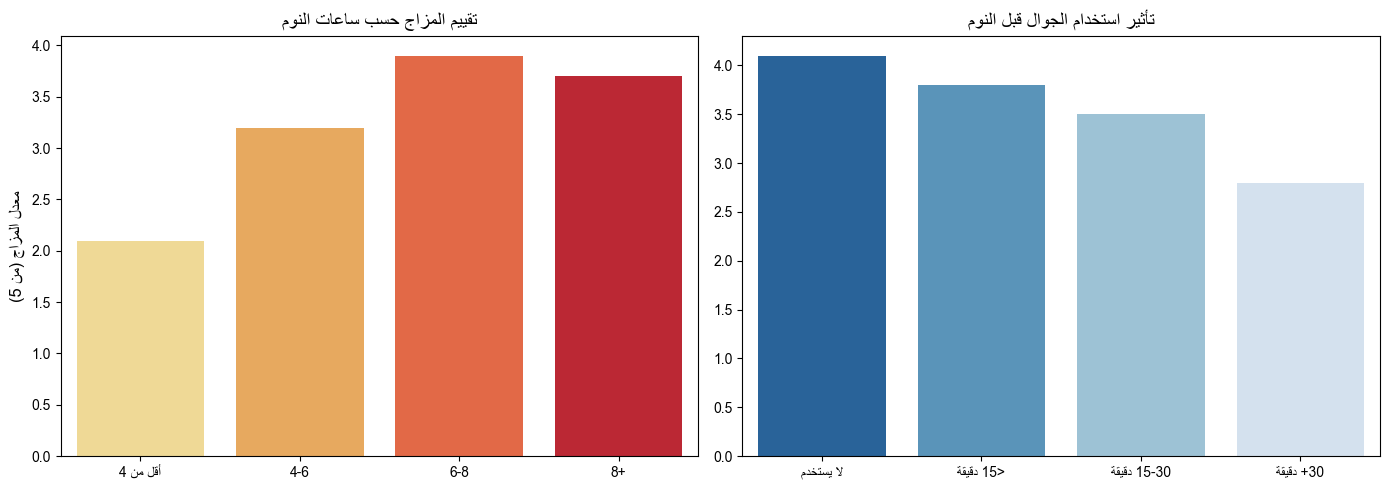

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

# تشكيل النصوص العربية
def reshape(text):
    return get_display(arabic_reshaper.reshape(text))

# إعداد البيانات
sleep_labels = ['أقل من 4', '4-6', '6-8', '8+']
sleep_scores = [2.1, 3.2, 3.9, 3.7]
sleep_labels = [reshape(label) for label in sleep_labels]

phone_labels = ['لا يستخدم', '<15 دقيقة', '15-30 دقيقة', '30+ دقيقة']
phone_scores = [4.1, 3.8, 3.5, 2.8]
phone_labels = [reshape(label) for label in phone_labels]

# إعداد الشكل
plt.rcParams['font.family'] = 'Arial'  # أو استخدم "Amiri" إن توفر
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# الرسم الأول: المزاج حسب النوم
sns.barplot(x=sleep_labels, y=sleep_scores, palette="YlOrRd", ax=ax[0])
ax[0].set_title(reshape("تقييم المزاج حسب ساعات النوم"), fontsize=14)
ax[0].set_ylabel(reshape("معدل المزاج (من 5)"), fontsize=12)

# الرسم الثاني: تأثير الجوال
sns.barplot(x=phone_labels, y=phone_scores, palette="Blues_r", ax=ax[1])
ax[1].set_title(reshape("تأثير استخدام الجوال قبل النوم"), fontsize=14)
ax[1].set_ylabel("")  # إزالة التكرار

# تحسين العرض
for axis in ax:
    axis.tick_params(axis='x', labelrotation=0)
    axis.set_xlabel("")

plt.tight_layout()
plt.savefig("sleep_analysis.png", dpi=300)
plt.show()


In [36]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Setup Arabic support
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False
sns.set_theme(style="whitegrid")

# Load data (example)
data = {
    'ساعات_النوم': [3, 4, 5, 6, 7, 8, 9]*10,
    'المزاج': np.random.randint(1, 6, 70),
    'استخدام_الجوال': np.random.choice(['لا', '<15', '15-30', '30+'], 70)
}
df = pd.DataFrame(data)

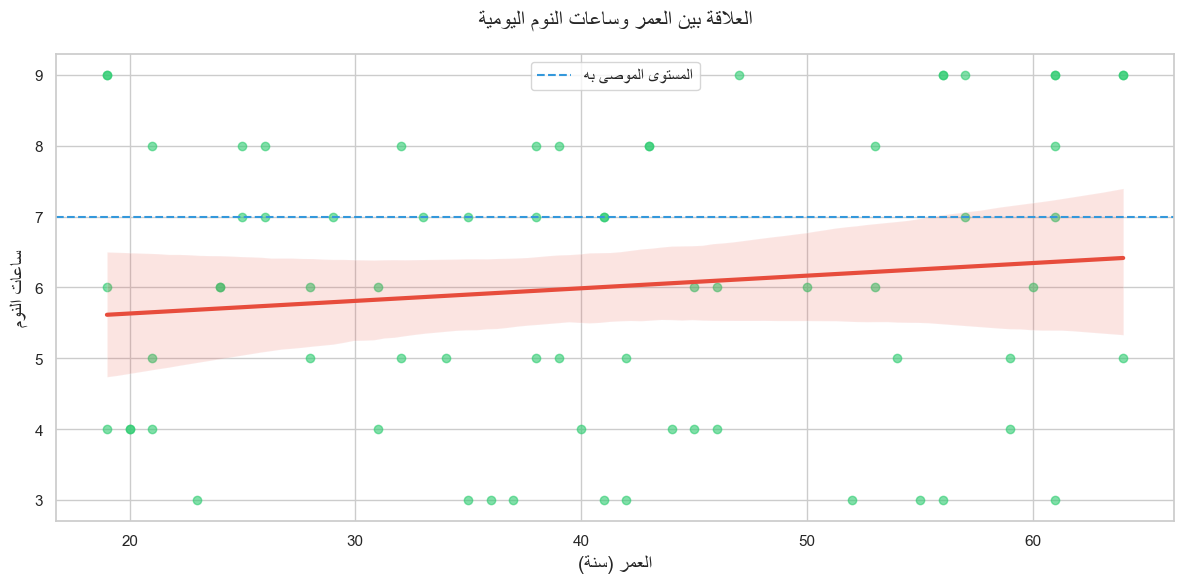

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

# تشكيل النص العربي للعرض الصحيح
def reshape(text):
    return get_display(arabic_reshaper.reshape(text))

# محاكاة بيانات العمر
np.random.seed(42)
df['العمر'] = np.random.randint(18, 65, len(df))

# رسم العلاقة بين العمر وساعات النوم
plt.figure(figsize=(12, 6))
sns.regplot(x='العمر', y='ساعات_النوم', data=df,
            scatter_kws={'alpha': 0.6, 'color': '#2ecc71'},
            line_kws={'color': '#e74c3c', 'linewidth': 3})

plt.title(reshape('العلاقة بين العمر وساعات النوم اليومية'), fontsize=16, pad=20)
plt.xlabel(reshape('العمر (سنة)'), fontsize=14)
plt.ylabel(reshape('ساعات النوم'), fontsize=14)

plt.axhline(y=7, color='#3498db', linestyle='--', label=reshape('المستوى الموصى به'))
plt.legend(fontsize=12)

plt.tight_layout()
plt.savefig('age_vs_sleep.png', dpi=300, bbox_inches='tight')
plt.show()


C:\Users\gknow\AppData\Local\Temp\ipykernel_1924\1691743225.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='استخدام_الجوال_عرض', y='المزاج', data=df,


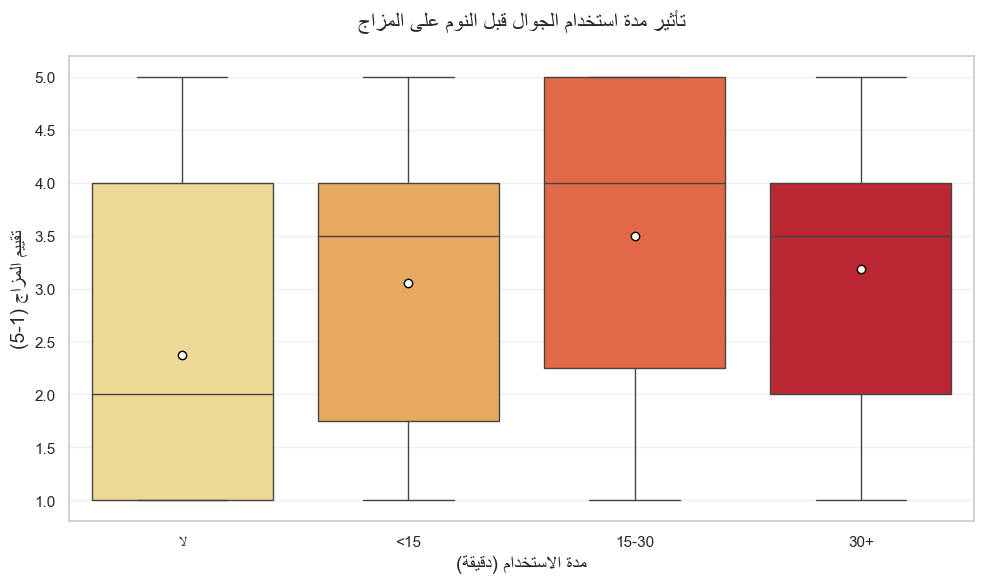

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

# دالة تشكيل النص العربي
def reshape(text):
    return get_display(arabic_reshaper.reshape(text))

# إعداد ترتيب المحاور بعد التشكيل
order_arabic = ['لا', '<15', '15-30', '30+']
order_arabic = [reshape(label) for label in order_arabic]

# تحويل القيم في العمود للعرض الصحيح (لضمان التوافق مع order)
df['استخدام_الجوال_عرض'] = df['استخدام_الجوال'].apply(lambda x: reshape(str(x)))

plt.figure(figsize=(10,6))
sns.boxplot(x='استخدام_الجوال_عرض', y='المزاج', data=df,
            order=order_arabic,
            palette="YlOrRd", showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})

plt.title(reshape('تأثير مدة استخدام الجوال قبل النوم على المزاج'), fontsize=16, pad=20)
plt.xlabel(reshape('مدة الاستخدام (دقيقة)'), fontsize=14)
plt.ylabel(reshape('تقييم المزاج (1-5)'), fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('phone_impact.png', dpi=300, bbox_inches='tight')
plt.show()


In [42]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# تشكيل النصوص العربية
def reshape(text):
    return get_display(arabic_reshaper.reshape(text))

# تحميل البيانات
df = pd.read_csv("sleep_data_clean.csv")  # غيّر اسم الملف لو لازم

st.title(reshape("📊 دراسة تأثير النوم باستخدام بايثون"))

st.markdown(reshape("""
### نظرة عامة
تم جمع البيانات من استبيان يتناول عادات النوم وتأثيرها على المزاج والطاقة والتركيز، باستخدام Python وأدوات التحليل البياني.
"""))

# توزيع ساعات النوم
st.subheader(reshape("توزيع ساعات النوم"))

fig, ax = plt.subplots()
sns.histplot(df['ساعات_النوم'], kde=True, color="#3498db")
plt.xlabel(reshape("عدد الساعات"))
plt.ylabel(reshape("عدد المشاركين"))
st.pyplot(fig)

# العلاقة بين العمر وساعات النوم
st.subheader(reshape("العلاقة بين العمر وساعات النوم"))

fig2, ax2 = plt.subplots()
sns.regplot(x='العمر_الرقمي', y='ساعات_النوم', data=df,
            scatter_kws={'alpha': 0.6, 'color': '#2ecc71'},
            line_kws={'color': '#e74c3c', 'linewidth': 3})
plt.axhline(y=7, color='blue', linestyle='--', label=reshape("المستوى الموصى به"))
plt.legend()
plt.xlabel(reshape("العمر"))
plt.ylabel(reshape("ساعات النوم"))
st.pyplot(fig2)


FileNotFoundError: [Errno 2] No such file or directory: 'sleep_data_clean.csv'